In [3]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm

## Hypothesis Testing - Completion Rate

Given the data and KPIs you have explored discussed, one interesting hypothesis to test is related to the completion rate between the Test and Control groups. Since the new design (Test group) had a higher completion rate compared to the old design (Control group), you are required to confirm if this difference is statistically significant.

Make sure to define the proper null and an alternative hypothesis to test it. Use the provided data to test these hypotheses, and determine if you can reject the null hypothesis in favor of the alternative. Make sure to consider the significance level, p-value, the statistical test prerequisites, and other relevant statistical measures in your analysis.

In [14]:
# Completion Rates
cr = 0.5444693302507044
cr_test = 0.5851734166307626
cr_control = 0.4984932740998478

# Sample sizes
n_test = 37136
n_control = 32189

In [16]:
# H0: The new design does not result in a higher completion rate
# H1: The new design results in a higher completion rate

In [18]:
# Number of completions
x_test = int(cr_test * n_test)
x_control = int(cr_control * n_control)

In [20]:
# Counts and sample sizes
c = np.array([x_test, x_control])
n = np.array([n_test, n_control])

In [22]:
# One-tailed z-test (alternative='larger' tests if test > control)
z_stat, p_value = proportions_ztest(c, n, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.8f}")

Z-statistic: 22.8568
P-value: 0.00000000


#### P-Value is very close to 0, meaning that the null hypothesis can be discarded. The Test group’s higher completion rate is statistically significant.

## Hypothesis Testing - Error Rate

In [32]:
# H0: The new design does not increase the error rate
# H1: The new design results in a higher error rate

# Error rates
er_test = 0.2718
er_control = 0.2064

# Sample sizes
nu_test = 37136
nu_control = 32189

# Number of errors
y_test = int(er_test * nu_test)
y_control = int(er_control * nu_control)

# Counts and sample sizes
cou = np.array([y_test, y_control])
numm = np.array([nu_test, nu_control])

# One-tailed z-test (alternative='larger' tests if test > control)
er_z_stat, er_p_value = proportions_ztest(cou, numm, alternative='larger')

print(f"Z-statistic: {er_z_stat:.4f}")
print(f"P-value: {er_p_value:.8f}")

Z-statistic: 20.0709
P-value: 0.00000000


## Hypothesis Testing - Error Criticality

In [ ]:
# H0: The rate of critical errors in Test <= Control
# H1: The rate of critical errors in Test > Control

# Critical error rates
critical_control = 0.4644
critical_test = 0.5728

# Sample sizes (adjust if different)
n_control = 32189
n_test = 37136

# Number of users who had critical errors
x_control = int(critical_control * n_control)
x_test = int(critical_test * n_test)

# Format for the z-test
count = np.array([x_test, x_control])
nobs = np.array([n_test, n_control])

# One-tailed z-test (testing if Test > Control)
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.8f}")

## Hypothesis Testing - Completion Rate with a Cost-Effectiveness Threshold

The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn't lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

In [24]:
# H0 = the new design does not meet the 5% improvement threshold
# H1 = the new design meets or exceeds the 5% improvement threshold

In [26]:
# Define the 5% improvement threshold
threshold_completion_rate = 0.4985 + 0.05
threshold_difference = threshold_completion_rate - (x_control / n_control)

In [28]:
# Perform the z-test for the 5% improvement threshold
threshold_z_stat, threshold_p_value = proportions_ztest(c, n, alternative='larger')

print(f"New Z-statistic (Threshold Test): {threshold_z_stat:.4f}")
print(f"New P-value (Threshold Test): {threshold_p_value:.8f}")
print(f"Threshold completion rate: {threshold_completion_rate:.4f}")

New Z-statistic (Threshold Test): 22.8568
New P-value (Threshold Test): 0.00000000
Threshold completion rate: 0.5485


#### As the p-value is very close to 0 and well below the significance level (0.05), we reject the null hypothesis. The Test group meets and exceeds the 5% improvement threshold.

## Hypothesis Testing (exp. validity) - Average age & tenure of clients

In a well-designed A/B test, random assignment should ensure that user characteristics (like client age and tenure) are similarly distributed across groups.

If average age or tenure is significantly different between the Test and Control groups, it might confound the results, because differences in engagement could be due to tenure, not the new design.

Now what we would like to test is if the average client tenure and age in the Test group is significantly different from that in the Control group.

In [5]:
# upload the experiment + footprint dataframe
df = pd.read_csv('/Users/josebabermejo/Ironhack/5. Quests/project_vanguard_joseba/experiment_footprints_clients.csv')
df

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [34]:
# Group by 'client_id' and take the first value of each group
grouped_df = df.groupby('client_id', as_index=False).first()

In [36]:
# Drop the column that were not necessary for this analysis
grouped_df = grouped_df.drop(['visitor_id', 'visit_id', 'process_step', 'date_time'], axis=1)

In [40]:
# upload the client profiles csv
df1 = pd.read_csv('/Users/josebabermejo/Ironhack/5. Quests/project_vanguard_joseba/client_profiles_clean.csv')

In [42]:
# Group by 'client_id' and take the first value of each group
grouped_df1 = df1.groupby('client_id', as_index=False).first()

In [46]:
#To drop the column that were not necessary for this analysis
grouped_df1 = grouped_df1.drop(['num_accts', 'clnt_tenure_yr', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'gendr'], axis=1)

In [48]:
# convert months to years for readability
grouped_df1['clnt_tenure_mnth'] = (grouped_df1['clnt_tenure_mnth'] / 12).round(1)

In [50]:
# Rename the column
grouped_df1.rename(columns={'clnt_tenure_mnth': 'clnt_tenure_yr'}, inplace=True)

In [52]:
# merge the dataframes
merged_df = pd.merge(grouped_df1, grouped_df, on='client_id', how='inner')

Test time!

In [54]:
# H0: Test avg age = Control avg age
# H1: Test avg age =! Control avg age

# H0: Test avg tenure = Control avg tenure
# H1: Test avg tenure =! Control avg tenure

In [56]:
# Here is to test for the P-value of Clnt_tenure
df_test_tenure = merged_df[merged_df["Variation"]=="Test"]["clnt_tenure_yr"]
df_control_tenure = merged_df[merged_df["Variation"]=="Control"]["clnt_tenure_yr"]

In [58]:
st.ttest_ind(df_control_tenure, df_test_tenure, equal_var=False, alternative = 'two-sided')

TtestResult(statistic=1.6596801652982567, pvalue=0.09698514524079052, df=49507.2847926463)

In [60]:
# Here is to test for the P-value of Clnt_age
df_test_age = merged_df[merged_df["Variation"]=="Test"]["clnt_age"]
df_control_age = merged_df[merged_df["Variation"]=="Control"]["clnt_age"]

In [62]:
st.ttest_ind(df_control_age,df_test_age , equal_var=False, alternative = 'two-sided')

TtestResult(statistic=2.416068061200627, pvalue=0.015692719461388685, df=49556.715189428134)

<Axes: xlabel='clnt_age', ylabel='Count'>

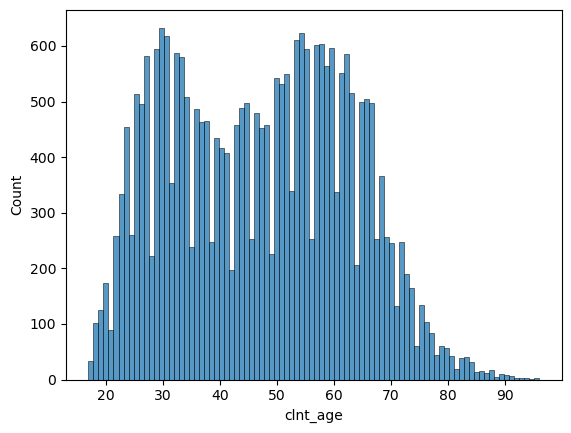

In [64]:
# Histogram to see the distribution as the p value we got was unexpected
sns.histplot(data=df_test_age, bins=90)

<Axes: xlabel='clnt_age', ylabel='Count'>

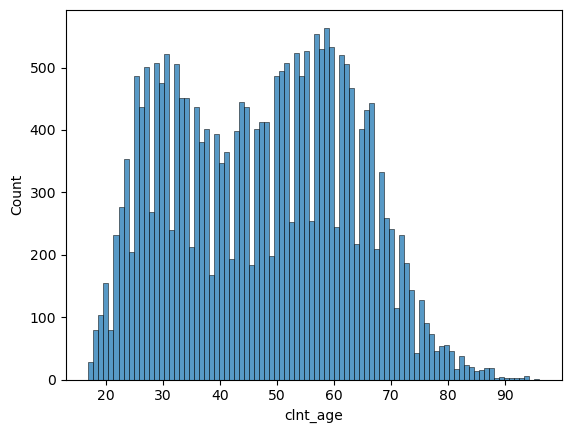

In [66]:
sns.histplot(data=df_control_age, bins=90)

## Experiment evaluation

You are also required to carry out an evaluation of the experiment by answering questions about the design effectiveness, duration and any additional data needs. See the full details below:

- Was the experiment well-structured?
- Were clients randomly and equally divided between the old and new designs?
- Were there any biases?
- Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?
- What other data, if available, could enhance the analysis?

In [7]:
df = pd.read_csv('/Users/josebabermejo/Ironhack/5. Quests/project_vanguard_joseba/experiment_footprints_clients.csv')
df.head()

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [9]:
df1 = pd.read_csv('/Users/josebabermejo/Ironhack/5. Quests/project_vanguard_joseba/client_profiles_clean.csv')
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [57]:
print(df.shape)
print(df1.shape)

(321309, 6)
(70594, 9)


In [11]:
# df: drop columns and groupby client id

df_filtered = df[['client_id', 'Variation']]
df_grouped = df_filtered.groupby('client_id', as_index=False).first()

In [13]:
# df1: drop clnt_tenure_yr

df1 = df1.drop(columns=['clnt_tenure_yr'])

In [15]:
# Merge df_filtered and df1 on 'client_id'

combined_df = pd.merge(df1, df_grouped, on='client_id', how='inner')

In [17]:
combined_df.head()

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [19]:
combined_df.to_excel('experiment_evaluation.xlsx')

In [69]:
# Split the group into 'Test' and 'Control'

test_group = combined_df[combined_df['Variation'] == 'Test']
control_group = combined_df[combined_df['Variation'] == 'Control']

In [82]:
numeric_cols = ['clnt_age', 'clnt_tenure_mnth', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

## MEAN

In [85]:
# Create summary table for means

mean_df = pd.DataFrame({
    'Test': test_group[numeric_cols].mean(),
    'Control': control_group[numeric_cols].mean()
})
mean_df

,Test,Control
clnt_age,47.163922,47.498427
clnt_tenure_mnth,149.852899,151.062102
num_accts,2.249917,2.259925
bal,148962.605032,150151.900186
calls_6_mnth,3.061941,3.129176
logons_6_mnth,6.101851,6.166242


## MEDIAN

In [90]:
# Create summary table for medians

median_df = pd.DataFrame({
    'Test': test_group[numeric_cols].median(),
    'Control': control_group[numeric_cols].median()
})
median_df

,Test,Control
clnt_age,47.50,48.50
clnt_tenure_mnth,134.00,137.00
num_accts,2.00,2.00
bal,65468.36,66031.45
calls_6_mnth,3.00,3.00
logons_6_mnth,6.00,6.00


In [87]:
# Calculate percentage of gender distribution

gender_dist = pd.DataFrame({
    'Test': test_group['gendr'].value_counts(normalize=True) * 100,
    'Control': control_group['gendr'].value_counts(normalize=True) * 100
}).fillna(0)

gender_dist

,Test,Control
gendr,,
U,34.375580,34.064439
M,33.296243,33.877412
F,32.328178,32.058148


### Experiment design assessment summary

The experiment appears to be well-structured. The Test and Control groups exhibit nearly identical distributions across all key variables (client age, tenure, number of accounts, balance, number of calls, and logons in the past six months). Both the mean and median values for these variables are closely aligned between the groups, suggesting that no group was systematically different from the other at baseline.

Clients also seem to have been randomly and equally divided between the old and new designs. The gender distribution is balanced across the groups, with approximately one-third identifying as male, one-third as female, and one-third listed as unknown, a consistency that supports the idea of randomized assignment.

### Duration assessment

The experiment ran from March 15 to June 20, spanning just over three months, which aligns well with best practices for traditional A/B testing, particularly in industries such as banking, finance, or tech, where user behavior and conversion cycles may span days to weeks. It also helps mitigate short-term anomalies and provides a stable window for data collection. Therefore, the experiment’s timeframe appears adequate for generating reliable insights, assuming consistent traffic and exposure throughout the period.

### Additional data needs

To deepen the analysis and extract more insights, the following data would be valuable:

#### 1. Outcome metrics: 
- Conversions, revenue impact, click-through rates, customer churn, NPS, or account upgrades to assess the actual performance impact of the test.

#### 2. Further segmentation:
- Customer segments by geography, device type, or channel (app/desktop) to test for heterogeneous treatment effects.

#### 3. Traffic data:
- Periodic traffic volume and assignment counts to verify even distribution over time, and ensure no implementation errors (like spikes or dips in one group).

#### 4. KPI analysis:
- Any behavioral or financial KPIs directly affected by the test (e.g., number of transactions, average balance growth).